In [1]:
## Importing the required libraries
import tensorflow as tf
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle


## Reading all the images and converting them into an array for data and labels

In [2]:
training_Data = []

img_size = 224
Datadirectory = "Train_Dataset/"
Classes = ["Closed_Eyes","Open_Eyes"]

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [3]:
create_training_Data()

In [4]:
print(len(training_Data))

4591


In [5]:
import random

random.shuffle(training_Data)

In [6]:
x = []
y = []

for features, label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [7]:
x.shape

(4591, 224, 224, 3)

In [8]:
## Normalise the Data
x = x/255.0 ;

In [9]:
y = np.array(y)

In [10]:
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

## Deep Learning Model for Training - Transfer Learning

In [12]:
## Importing the required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
#train our moddel
model = tf.keras.applications.mobilenet.MobileNet()

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [15]:
base_input = model.layers[0].input ## Input

In [16]:
base_output = model.layers[-4].output ## Output

In [17]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## One Node (1/0)
final_ouput = layers.Activation('sigmoid')(final_output)

In [18]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [19]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

## Setting for Binary Classification (Open/Closed)

In [20]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [21]:
#training the model one time.
new_model.fit(x,y, epochs = 1, validation_split = 0.1) ## Training

130/130 [==============================] - 735s 6s/step - loss: 3.9809 - accuracy: 0.7315 - val_loss: 6.7400 - val_accuracy: 0.5630


In [22]:
new_model.save("my_model.h5")

In [23]:
new_model = tf.keras.models.load_model("my_model.h5")

## Checking the Network for Prediction

In [24]:
img_array = cv2.imread("s0034_00737_0_0_1_0_0_02.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [25]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [26]:
x_input.shape

(1, 224, 224, 3)

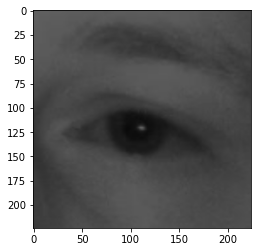

In [27]:
plt.imshow(new_array)

In [28]:
x_input = x_input/255.0 ;

In [29]:
img_array = cv2.imread("s0016_00012_1_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [30]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [31]:
x_input.shape

(1, 224, 224, 3)

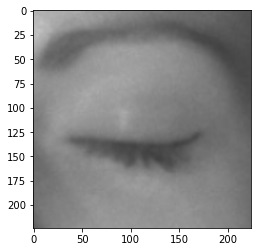

In [32]:
plt.imshow(new_array)

In [33]:
x_input = x_input/255.0 ;

In [34]:
prediction = new_model.predict(x_input)

In [35]:
prediction

array([[-77.210495]], dtype=float32)

## Chaeck on unknown images

In [36]:
img = cv2.imread('sad_woman.jpg')

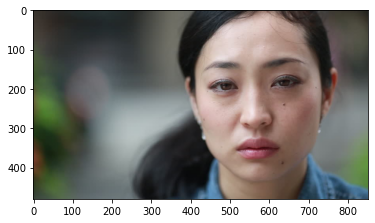

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
#%pip install opencv-contrib-python --upgrade 
#%pip install opencv-python
#%pip install opencv-contrib-python

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [42]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [43]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

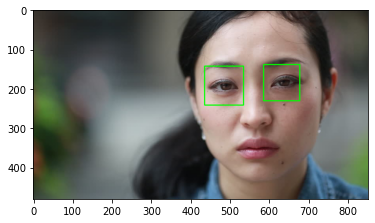

In [44]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Cropping the eye image

In [45]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not Detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

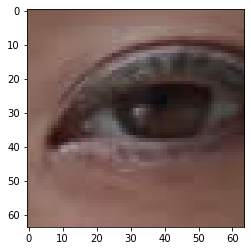

In [46]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [47]:
eyes_roi.shape

(64, 64, 3)

In [48]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0) ## Need Fourth Dimension
final_image = final_image/255.0

In [49]:
final_image.shape

(1, 224, 224, 3)

In [50]:
new_model.predict(final_image)

array([[-41.928802]], dtype=float32)

# Detect sleepy driver or not

In [51]:
frequency = 2500 ## Setting Frequency to 2500hz
duration = 2000 ## set duration to 3 second
import winsound
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
## Check if the Webcam is openned correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray, 1.01, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not Detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) ## Need Fourth Dimension
    final_image = final_image/255.0
    
    prediction = new_model.predict(final_image)
    if (prediction>0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray, 1.01, 4)
    
    ## Dram a rectangle around the faces
    for x, y, w, h in eyes:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    ## Use puttext() method for inserting text on video
    cv2.putText(frame,
                status,
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    cv2.imshow("Drowsiness Detection", frame)
    winsound.Beep(frequency, duration)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
False
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
Eyes are not Detected
Eyes are not Detected
False
Eyes are not Detected
False
False
Eyes are not Detected
False
Eyes are not Detected
Eyes are not